<a href="https://colab.research.google.com/github/Akshat13shah/STT_Ai_Assignment6/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS203 Lab 6

### Team Number: 18
* Name: Paras Prashant Shirvale
* Roll No: 23110232
---
* Name: Akshat Shah
* Roll No: 23110293
---

## Section 1: MLP Model Implementation & Experiment Tracking

In [ ]:
!pip install tensorflow

In [ ]:
!pip install seaborn

In [ ]:
!pip install wandb

In [23]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [24]:
# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target.reshape(-1, 1)

In [25]:
# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

In [26]:
# Split the dataset into training, validation, and test sets (70%, 10%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=42)

In [27]:
# Normalize the feature values to the range [0,1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [28]:
# Step 4: Define MLP Model
model = models.Sequential([
    layers.InputLayer(input_shape=(4,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [29]:
# Step 5: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.0454 - loss: 1.3844 - val_accuracy: 0.1333 - val_loss: 1.3190
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0382 - loss: 1.3419 - val_accuracy: 0.1333 - val_loss: 1.2832
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0746 - loss: 1.2973 - val_accuracy: 0.1333 - val_loss: 1.2491
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1190 - loss: 1.2480 - val_accuracy: 0.2000 - val_loss: 1.2171
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1412 - loss: 1.2040 - val_accuracy: 0.2667 - val_loss: 1.1868
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1814 - loss: 1.1613 - val_accuracy: 0.2667 - val_loss: 1.1577
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2137 - loss: 1.1203 - val_accuracy: 0.2667 - val_loss: 1.1304
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2608 - loss: 1.0871 - val_accuracy: 0.2667 - val_loss: 1.1044

In [ ]:
# Step 8: Evaluate the model on the test set
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [ ]:
# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

In [ ]:
import wandb

In [ ]:
# Step 6: Set up W&B for experiment tracking
wandb.init(project="mlp-iris", config={
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 50
})

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: akshat13 (akshat13-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [ ]:
wandb.config.update({
    "Architechture": "MLP",
    "Neurons_hidden_layer": 16,
    "hidden_activation_function": "relu",
    "Neurons_input_layer": 4,
    "Neurons_output_layer": 3,
    "output_activation_function": "softmax",
    "loss_function": "categorical_crossentropy",
    "optimizer": "adam"
})

In [ ]:
# Log the metrics to W&B
wandb.log({
    "test_accuracy": accuracy,
    "test_precision": precision,
    "test_recall": recall,
    "test_f1": f1
})

In [ ]:
# Print metrics and confusion matrix
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")

Test Accuracy: 0.8667
Test Precision: 0.9022
Test Recall: 0.8667
Test F1-Score: 0.8579


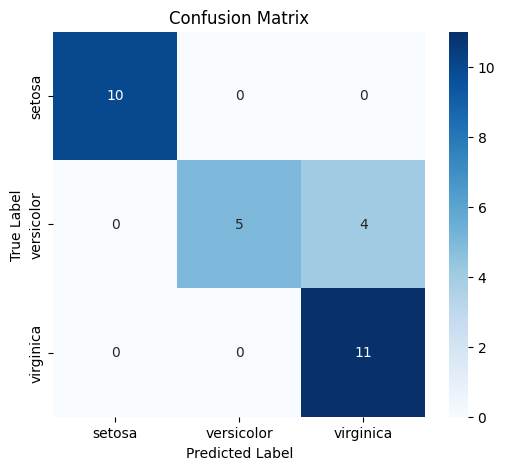

In [ ]:
import seaborn as sns

# Step 1: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.show()
plt.close()

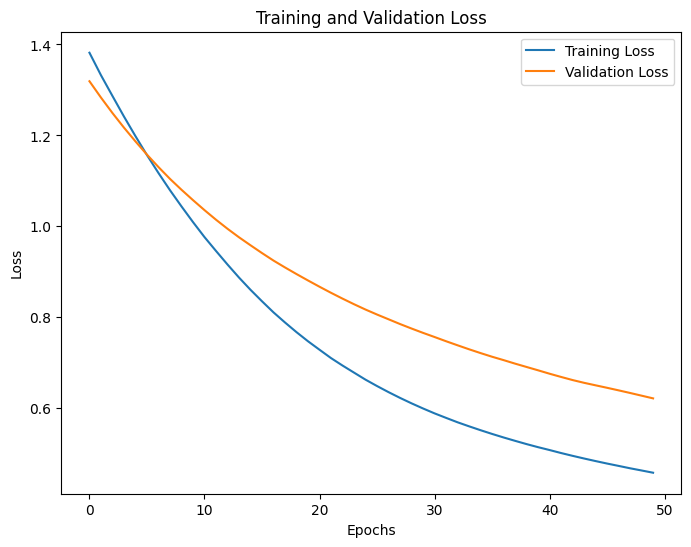

In [ ]:
# Step 2: Loss Curve Visualization
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
wandb.log({"loss_curve": wandb.Image(plt)})
plt.show()
plt.close()

In [ ]:
for epoch, (train_loss, val_loss) in enumerate(zip(history.history['loss'], history.history['val_loss'])):
    wandb.log({
        "epoch": epoch + 1,
        "training_loss": train_loss,
        "validation_loss": val_loss
    })

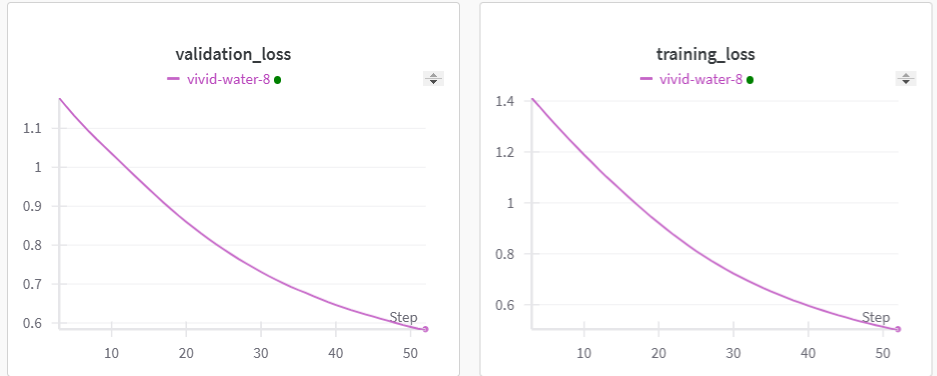

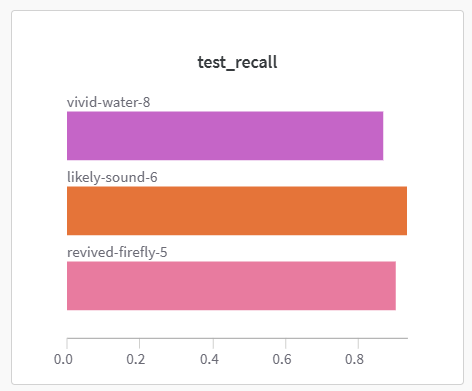

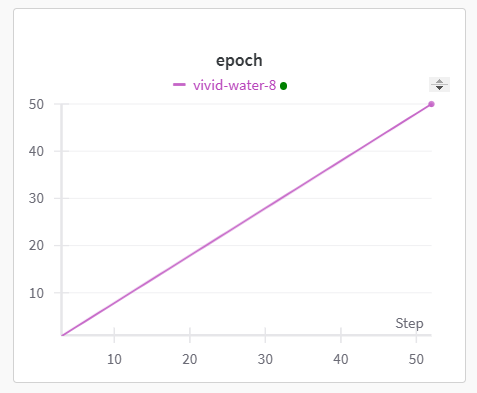

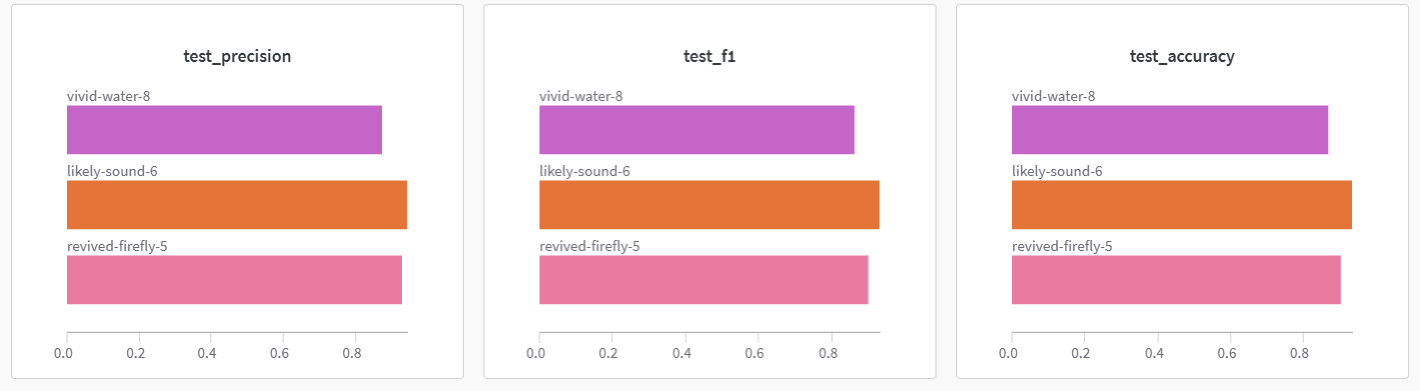

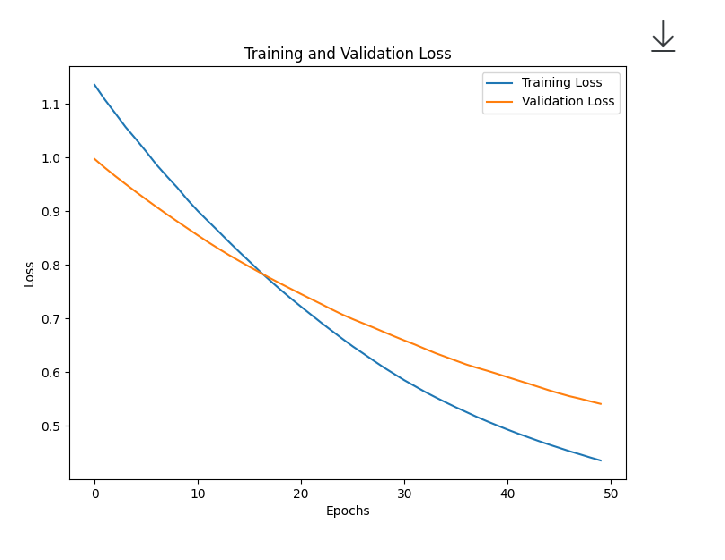

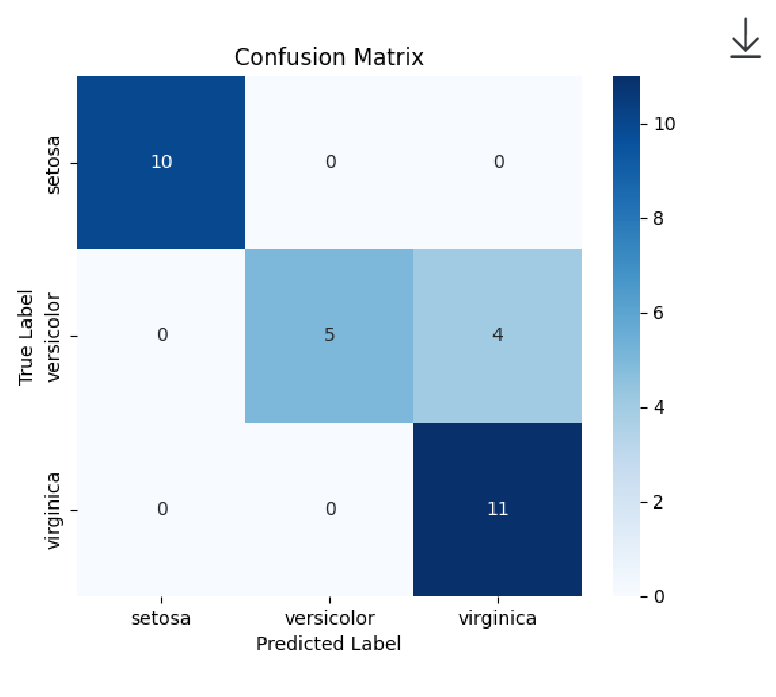

In [ ]:
wandb.finish()

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_f1,▁
test_precision,▁
test_recall,▁
training_loss,██▇▇▇▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
validation_loss,██▇▇▇▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,50
test_accuracy,0.86667
test_f1,0.85788
test_precision,0.90222


## Section 2: Hyperparameters
This section aims to perform a hyperparameter search to improve the performance of a custom model that distinguishes between any two classes (positive/negative or anything).


In [ ]:
!pip install --upgrade tensorflow


In [22]:
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense


config_list_grid = []

# Define parameters for grid search
param_grid = {
    'batch_size': [2, 4],
    'learning_rate': [0.001, 1e-5],
    'epochs': [1, 3, 5]  # Removed epochs=1 cases from plotting
}

results = []

# Perform grid search
for batch_size in param_grid['batch_size']:
    for learning_rate in param_grid['learning_rate']:
        for epochs in param_grid['epochs']:
            print(f"\nTraining model with batch_size={batch_size}, learning_rate={learning_rate}, epochs={epochs}")
            keras.backend.clear_session()  # Reset model state

            # Initialize the MLP model
            model = models.Sequential([
                layers.InputLayer(input_shape=(4,)),
                layers.Dense(16, activation='relu'),
                layers.Dense(3, activation='softmax')
            ])

            # Compile the model with Adam optimizer
            model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                          loss=keras.losses.BinaryCrossentropy())

            # Train the model
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                verbose=1, validation_split=0.1)

            # Generate predictions
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_test_classes = np.argmax(y_test, axis=1)

            # Compute performance metrics
            accuracy = accuracy_score(y_test_classes, y_pred_classes)
            f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
            config_list_grid.append((batch_size, learning_rate, epochs))

            # Save results
            results.append({
                'batch_size': batch_size,
                'learning_rate': learning_rate,
                'epochs': epochs,
                'accuracy': accuracy,
                'f1': f1,
                'train_loss': history.history['loss'],
                'val_loss': history.history['val_loss'],
                'y_pred_classes': y_pred_classes,
                'y_test_classes': y_test_classes
            })

            # Display sample predictions
            print("\nSample Predictions:")
            print("Features | True Label | Predicted Label")
            print("-" * 30)
            for i in range(min(5, len(X_test))):
                print(f"{X_test[i]} | {y_test_classes[i]} | {y_pred_classes[i]}")

            # Output evaluation metrics
            print(f"\nResults for batch_size={batch_size}, learning_rate={learning_rate}, epochs={epochs}")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1:.4f}")



Training model with batch_size=2, learning_rate=0.001, epochs=1


NameError: name 'models' is not defined

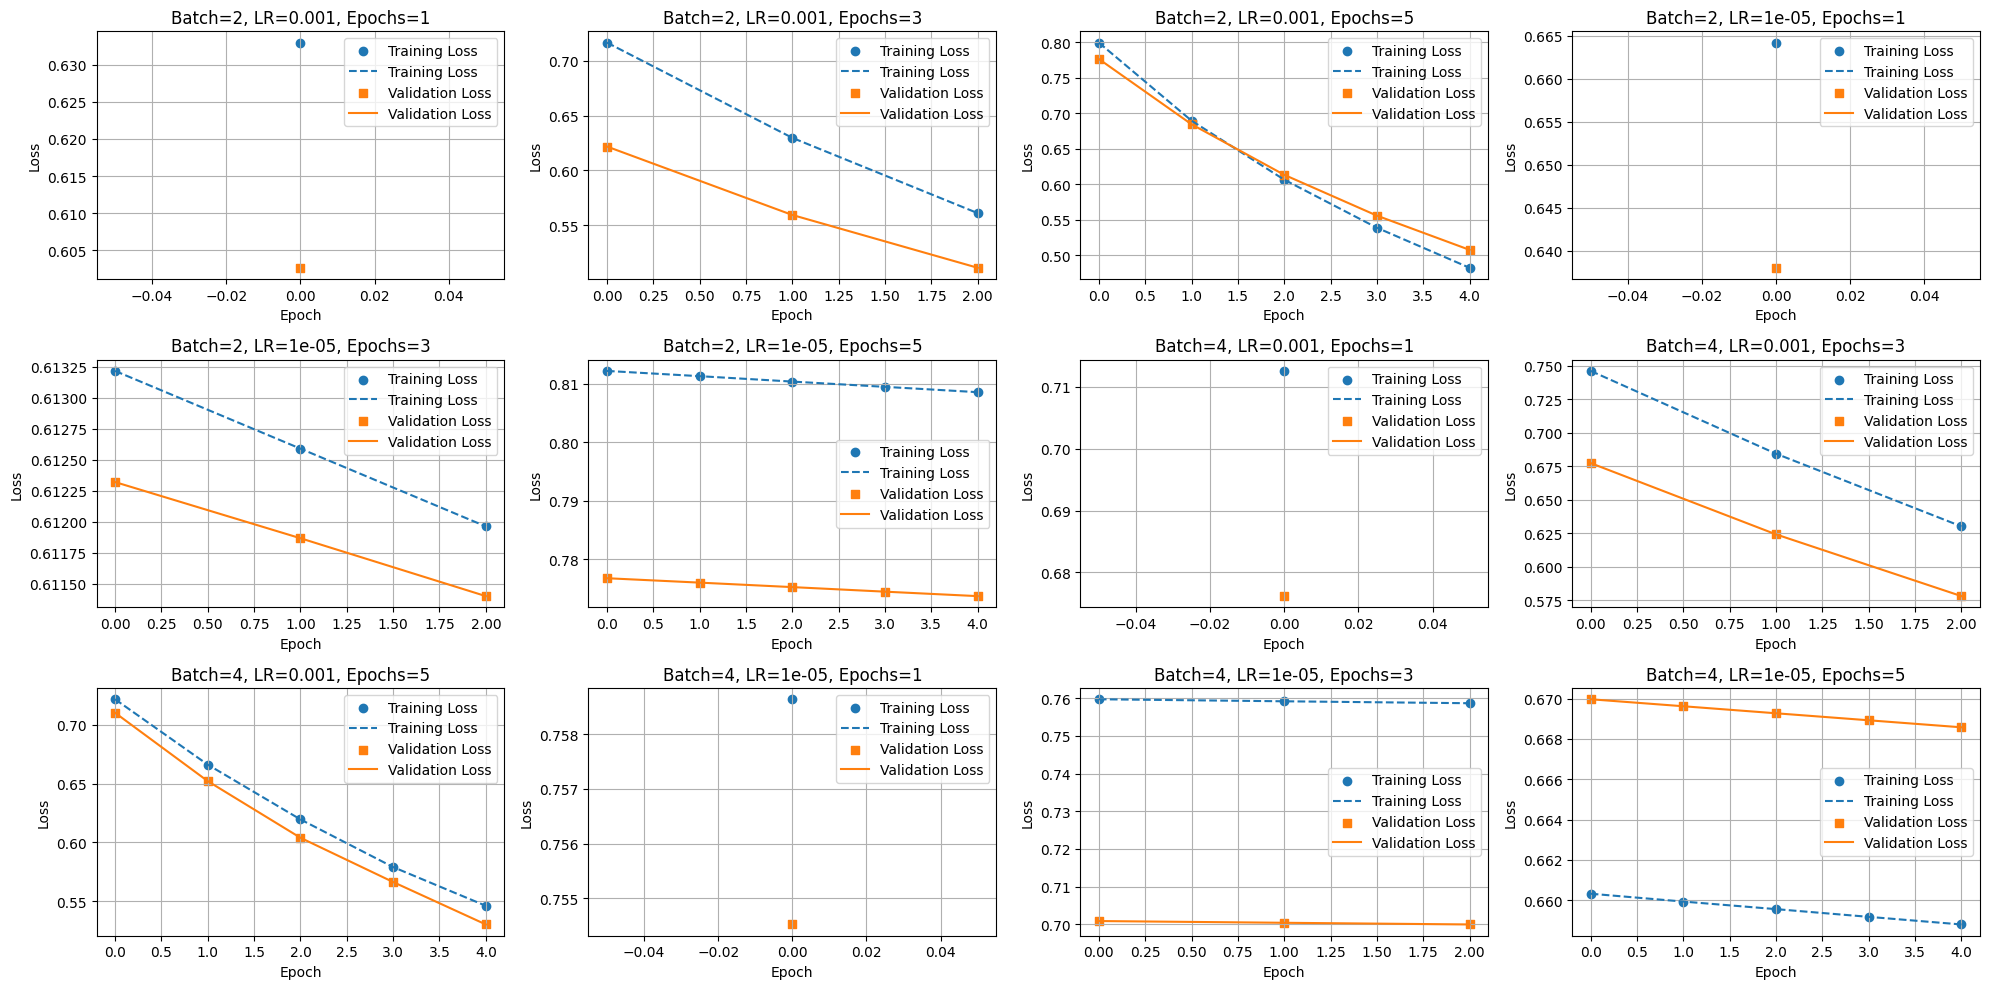

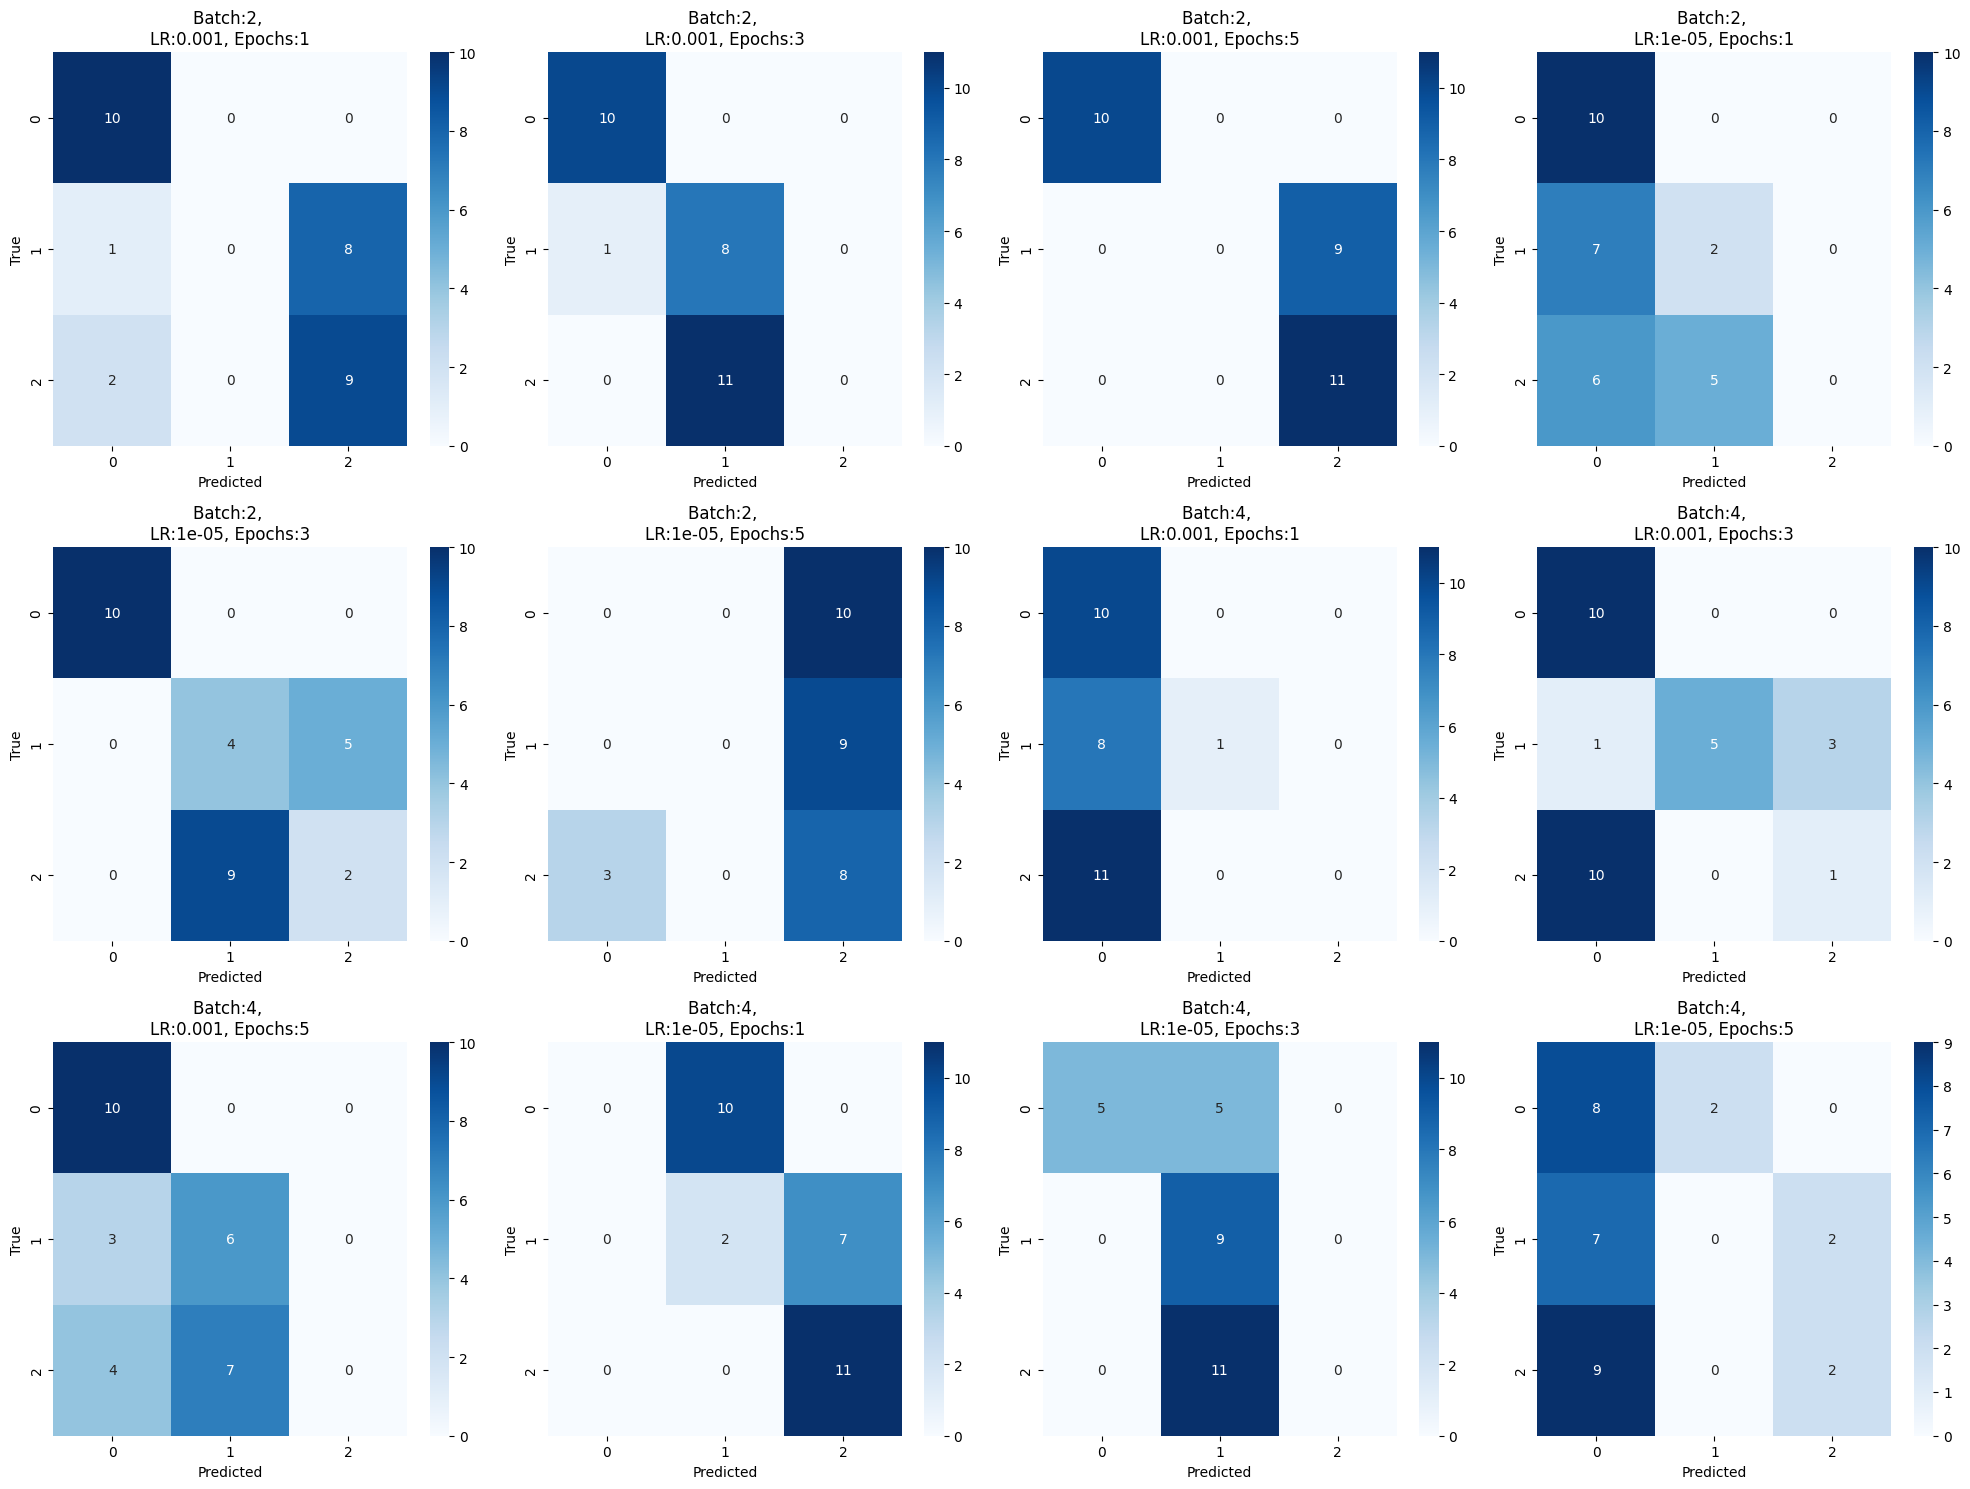

In [ ]:
# Plot training and validation losses in a 2-row, 4-column grid
num_plots = min(len(results), 12)  # Ensure we don't exceed subplot limit
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i in range(num_plots):
    result = results[i]
    ax = axes[i]
    ax.scatter(range(len(result['train_loss'])), result['train_loss'], label='Training Loss', marker='o')
    ax.plot(result['train_loss'], label='Training Loss', linestyle='dashed')
    ax.scatter(range(len(result['val_loss'])), result['val_loss'], label='Validation Loss', marker='s')
    ax.plot(result['val_loss'], label='Validation Loss', linestyle='solid')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(f'Batch={result["batch_size"]}, LR={result["learning_rate"]}, Epochs={result["epochs"]}')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plot Confusion Matrices for all configurations
plt.figure(figsize=(20, 15))
for i, result in enumerate(results):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns to accommodate all 12 configurations
    cm = confusion_matrix(result['y_test_classes'], result['y_pred_classes'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Batch:{result["batch_size"]}, \nLR:{result["learning_rate"]}, Epochs:{result["epochs"]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()
plt.show()

In [ ]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. 

In [33]:
import autogluon.common as ag
from autogluon.tabular import TabularPredictor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Load the Iris dataset and convert it into a DataFrame
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target  # Add target labels (Setosa, Versicolor, Virginica)

# Split data into train, test, and holdout sets (stratified split to maintain class balance)
train_test, holdout = train_test_split(data, test_size=0.1, stratify=data['target'], random_state=42)
train, test = train_test_split(train_test, test_size=0.2/0.9, stratify=train_test['target'], random_state=42)

# Define hyperparameter search space for NN_TORCH model
nn_hyperparameters = {
    'NN_TORCH': {
        'num_epochs': ag.space.Categorical(10, 20, 50),  # Train for different epoch values
        'learning_rate': ag.space.Real(1e-3, 1e-1, log=True),  # Log-scale search for LR
        'batch_size': ag.space.Categorical(16, 32),  # Explore small and large batch sizes
        'num_layers': ag.space.Categorical(1, 2),  # Single or two hidden layers
        'hidden_size': ag.space.Categorical(16, 32, 64),  # Number of neurons per layer
        'activation': ag.space.Categorical('relu', 'tanh')  # Try different activation functions
    }
}

# Include other models to improve robustness in case NN_TORCH doesn't perform well
hyperparameters = {
    'NN_TORCH': nn_hyperparameters['NN_TORCH'],  # Neural Network
    'GBM': {},  # Gradient Boosting Machine
    'RF': {},   # Random Forest
    'XT': {}    # Extra Trees
}

# Train the AutoGluon predictor with hyperparameter tuning
predictor = TabularPredictor(label='target', problem_type='multiclass', eval_metric='accuracy').fit(
    train_data=train,  # Use training data
    tuning_data=holdout,  # Use holdout data for hyperparameter tuning
    hyperparameters=hyperparameters,  # Models and search space
    num_bag_folds=0,  # Disable bagging (not needed for small dataset)
    num_stack_levels=0,  # Disable stacking
    hyperparameter_tune_kwargs={
        'num_trials': 10,  # Limit the number of trials for tuning
        'scheduler': 'local',  # Run tuning locally
        'searcher': 'random'  # Random search strategy
    },
    time_limit=600,  # Maximum time limit in seconds (10 minutes)
    verbosity=3  # Increase verbosity to get detailed logs
)

# Evaluate performance on the test set
y_test = test['target']
y_pred = predictor.predict(test.drop(columns=['target']))  # Make predictions
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")  # Print accuracy
print(f"Test F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")  # Print weighted F1 score

# Display leaderboard to compare model performance
leaderboard = predictor.leaderboard(test, extra_info=True)
print(leaderboard)


No path specified. Models will be saved in: "AutogluonModels/ag-20250226_180044"
Verbosity: 3 (Detailed Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       9.88 GB / 12.67 GB (78.0%)
Disk Space Avail:   73.47 GB / 107.72 GB (68.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users.

  0%|          | 0/10 [00:00<?, ?it/s]

Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/dataset_train.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'feature_fraction': 1.0, 'min_data_in_leaf': 20, 'num_leaves': 31}
Saving /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T1/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/dataset_train.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.06994332504138302, 'feature_fraction': 0.8872033759818312, 'min_data_in_leaf': 5, 'num_leaves': 83}
Saving /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T2/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/dataset_train.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/dataset_val.pkl
	Fitting 10000 rounds... Hype

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 10                    |
+--------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch


Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00000/model.pkl
Fitted model: NeuralNetTorch/9cc34_00000 ...
	0.6	 = Validation score   (accuracy)
	4.15s	 = Training   runtime
	0.0s	 = Validation runtime
	4117.2	 = Inference  throughput (rows/s | 15 batch size)
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00001/model.pkl
Fitted model: NeuralNetTorch/9cc34_00001 ...
	0.9333	 = Validation score   (accuracy)
	4.0s	 = Training   runtime
	0.01s	 = Validation runtime
	2028.5	 = Inference  throughput (rows/s | 15 batch size)
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00002/model.pkl
Fitted model: NeuralNetTorch/9cc34_00002 ...
	0.8667	 = Validation score   (accuracy)
	3.7s	 = Training   runtime
	0.01s	 = Validation runtime
	2848.2	 = Inference  throughput (rows/s | 15 batch size)
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00003/model.pkl
Fitted model

Loading: /content/AutogluonModels/ag-20250226_180044/models/ExtraTrees/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00000/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00001/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00002/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00003/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00004/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00005/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00006/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00007/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00008/model.pkl
Loading: /content/AutogluonModels/ag-20250226_

Test Accuracy: 0.9032
Test F1 Score: 0.9019


Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T2/info.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T2/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T3/info.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T3/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T4/info.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T4/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T5/info.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T5/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T6/info.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T6/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T7/info.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/LightGBM/T7/model.pkl
Loading: /content/Auto

                         model  score_test  score_val eval_metric  \
0   NeuralNetTorch/9cc34_00003    0.967742   0.933333    accuracy   
1                 LightGBM/T10    0.935484   0.933333    accuracy   
2                  LightGBM/T2    0.935484   0.933333    accuracy   
3   NeuralNetTorch/9cc34_00006    0.935484   0.933333    accuracy   
4                   ExtraTrees    0.935484   0.971154    accuracy   
5                  LightGBM/T6    0.903226   0.933333    accuracy   
6                  LightGBM/T1    0.903226   0.933333    accuracy   
7                  LightGBM/T9    0.903226   0.933333    accuracy   
8          WeightedEnsemble_L2    0.903226   0.933333    accuracy   
9   NeuralNetTorch/9cc34_00001    0.903226   0.933333    accuracy   
10  NeuralNetTorch/9cc34_00009    0.903226   0.866667    accuracy   
11  NeuralNetTorch/9cc34_00007    0.903226   0.733333    accuracy   
12  NeuralNetTorch/9cc34_00005    0.903226   0.933333    accuracy   
13                RandomForest    

In [34]:
# Initialize an empty list to store model configurations and performance metrics
config_table = []

# Iterate over each model in the leaderboard
for _, model_row in leaderboard.iterrows():
    if 'NeuralNetTorch' in model_row['model']:  # Filter only NeuralNetTorch models
        # Use the model's predictions on the test data
        model_preds = predictor.predict(test.drop(columns=['target']), model=model_row['model'])

        # Calculate the weighted F1-score for the model
        f1 = f1_score(y_test, model_preds, average='weighted')

        # Store relevant information in the configuration table
        config_table.append({
            'Model': model_row['model'],  # Model name
            'Accuracy': model_row['score_test'],  # Test accuracy from leaderboard
            'F1': f1  # Computed weighted F1-score
        })

# Convert list into a DataFrame for better visualization
config_df = pd.DataFrame(config_table)

# Display the configuration performance table
print("\nConfiguration Performance Table:")
print(config_df[['Model', 'Accuracy', 'F1']])


Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00003/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00006/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00001/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00009/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00007/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00005/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00002/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00008/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00004/model.pkl
Loading: /content/AutogluonModels/ag-20250226_180044/models/NeuralNetTorch/9cc34_00000/model.pkl



Configuration Performance Table:
                        Model  Accuracy        F1
0  NeuralNetTorch/9cc34_00003  0.967742  0.967594
1  NeuralNetTorch/9cc34_00006  0.935484  0.935191
2  NeuralNetTorch/9cc34_00001  0.903226  0.903226
3  NeuralNetTorch/9cc34_00009  0.903226  0.903226
4  NeuralNetTorch/9cc34_00007  0.903226  0.903226
5  NeuralNetTorch/9cc34_00005  0.903226  0.903226
6  NeuralNetTorch/9cc34_00002  0.838710  0.833026
7  NeuralNetTorch/9cc34_00008  0.838710  0.836495
8  NeuralNetTorch/9cc34_00004  0.741935  0.720430
9  NeuralNetTorch/9cc34_00000  0.677419  0.561880


In [ ]:
import autogluon.common as ag
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target  # Add target labels

# Split dataset into train (70%), test (20%), and holdout (10%) using stratification
train_test, holdout = train_test_split(data, test_size=0.1, stratify=data['target'], random_state=42)
train, test = train_test_split(train_test, test_size=0.2/0.9, stratify=train_test['target'], random_state=42)

# Convert to AutoGluon-compatible datasets
train_data = TabularDataset(train)
test_data = TabularDataset(test)
holdout_data = TabularDataset(holdout)

# Define hyperparameter search space for NN_TORCH model
nn_hyperparameters = {
    'NN_TORCH': {
        'num_epochs': ag.space.Categorical(1, 3, 5),  # Try different numbers of epochs
        'learning_rate': ag.space.Categorical(1e-3, 1e-5),  # Learning rate selection
        'batch_size': ag.space.Categorical(2, 4),  # Different batch sizes
        'num_layers': 1,  # Single hidden layer
        'hidden_size': 16,  # Number of neurons
        'activation': 'relu'  # Activation function
    }
}

# Train the AutoGluon predictor with bagging enabled
predictor = TabularPredictor(label='target', problem_type='multiclass', eval_metric='accuracy').fit(
    train_data=train_data,
    tuning_data=holdout_data,  # Use holdout data for hyperparameter tuning
    hyperparameters=nn_hyperparameters,  # Neural network configurations
    num_bag_folds=5,  # Enable bagging to improve stability
    num_stack_levels=0,  # Disable stacking
    use_bag_holdout=True,  # Critical for holdout-based bagging
    hyperparameter_tune_kwargs={
        'num_trials': 10,  # Run 10 different hyperparameter trials
        'scheduler': 'local',  # Run tuning locally
        'searcher': 'bayes'  # Bayesian optimization for better hyperparameter selection
    },
    time_limit=600  # Maximum tuning time in seconds (10 minutes)
)

# Evaluate model performance on the test set
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))  # Make predictions
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")  # Display accuracy
print(f"Test F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")  # Display weighted F1-score

# Display leaderboard results for model comparison
leaderboard = predictor.leaderboard(test_data)
print("\nModel Leaderboard (Top Performers):")
print(leaderboard[['model', 'score_test', 'fit_time']])  # Show accuracy and fit time


No path specified. Models will be saved in: "AutogluonModels/ag-20250226_180152"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.85 GB / 12.67 GB (77.7%)
Disk Space Avail:   73.47 GB / 107.72 GB (68.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L1   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 10                      |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250226_180152/models/NeuralNetTorch_BAG_L1


In [ ]:
import pandas as pd
from sklearn.metrics import f1_score

# Initialize an empty list to store model configurations and performance metrics
config_table = []

# Iterate through the leaderboard to extract NeuralNetTorch models
for _, model_row in leaderboard.iterrows():
    if 'NeuralNetTorch' in model_row['model']:  # Filter for Neural Network models
        # Make predictions using the specific model from the leaderboard
        model_preds = predictor.predict(test_data.drop(columns=['target']), model=model_row['model'])

        # Compute weighted F1-score for model performance
        f1 = f1_score(y_test, model_preds, average='weighted')

        # Store relevant model performance details
        config_table.append({
            'Model': model_row['model'],  # Model name
            'Accuracy': model_row['score_test'],  # Accuracy from the leaderboard
            'F1': f1  # Computed weighted F1-score
        })

# Convert the list into a DataFrame for better visualization
config_df = pd.DataFrame(config_table)

# Display the configuration performance table
print("\nConfiguration Performance Table:")
print(config_df[['Model', 'Accuracy', 'F1']])


In [ ]:
# Split dataset into train and test sets (80% train, 20% test) with stratification
train, test = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=42)

# Convert to AutoGluon Tabular datasets
train_data = TabularDataset(train)
test_data = TabularDataset(test)

# Define the search space for neural network hyperparameters
nn_hyperparameters = {
    'NN_TORCH': {
        'num_epochs': ag.space.Categorical(1, 3, 5),  # Training epochs
        'learning_rate': ag.space.Categorical(1e-3, 1e-5),  # Learning rate choices
        'batch_size': ag.space.Categorical(2, 4),  # Small batch sizes
        'num_layers': 1,  # Number of hidden layers
        'hidden_size': 16,  # Neurons per hidden layer
        'activation': 'relu'  # Activation function
    }
}

# Train the AutoGluon predictor with Bayesian optimization for hyperparameter tuning
predictor = TabularPredictor(label='target', problem_type='multiclass', eval_metric='accuracy').fit(
    train_data=train_data,
    hyperparameters=nn_hyperparameters,
    hyperparameter_tune_kwargs={
        'num_trials': 10,  # Number of hyperparameter tuning trials
        'scheduler': 'local',
        'searcher': 'bayes'  # Bayesian optimization for efficient search
    },
    time_limit=600  # Maximum tuning time in seconds
)

# Evaluate the trained model on the test dataset
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Retrieve leaderboard to analyze model performance
leaderboard = predictor.leaderboard(test_data)
print(leaderboard[['model', 'score_test', 'fit_time']])

In [18]:
config_table = []
for _, model_row in leaderboard.iterrows():
    if 'NeuralNetTorch' in model_row['model']:
        # We'll use the model's predictions and performance metrics
        # Since we can't directly access hyperparameters, we'll extract what we can from model name
        model_preds = predictor.predict(test_data.drop(columns=['target']), model=model_row['model'])
        f1 = f1_score(y_test, model_preds, average='weighted')

        # Create entry with available information
        config_table.append({
            'Model': model_row['model'],
            'Accuracy': model_row['score_test'],
            'F1': f1,
        })

# Display the configuration table
config_df = pd.DataFrame(config_table)
print("\nConfiguration Performance Table:")
print(config_df[['Model', 'Accuracy', 'F1']])


Configuration Performance Table:
                     Model  Accuracy        F1
0  NeuralNetTorch/a1ecf75f  0.666667  0.536769
1  NeuralNetTorch/eb24d475  0.633333  0.508547
2  NeuralNetTorch/412d11e0  0.600000  0.490000
3  NeuralNetTorch/77c1c2ca  0.366667  0.310709
4  NeuralNetTorch/a4a74e03  0.066667  0.074074
5  NeuralNetTorch/d689a9d9  0.066667  0.078431
6  NeuralNetTorch/9213f780  0.066667  0.078431
7  NeuralNetTorch/62ba965f  0.066667  0.074074
8  NeuralNetTorch/ad93370d  0.066667  0.074074
9  NeuralNetTorch/756257b0  0.066667  0.074074


In [19]:
train, test = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=42)

# Convert to AutoGluon datasets
train_data = TabularDataset(train)
test_data = TabularDataset(test)

# Configure neural network search space
nn_hyperparameters = {
    'NN_TORCH': {
        'num_epochs': ag.space.Categorical(1,3, 5),
        'learning_rate': ag.space.Categorical(1e-3, 1e-5),
        'batch_size': ag.space.Categorical(2, 4),
        'num_layers': 1,  # Number of hidden layers
        'hidden_size': 16,  # Neurons in hidden layer
        'activation': 'relu'
    }
}

# Initialize predictor with bagged mode configuration
predictor = TabularPredictor(label='target', problem_type='multiclass', eval_metric='accuracy').fit(
    train_data=train_data,
    hyperparameters=nn_hyperparameters,
    hyperparameter_tune_kwargs={
        'num_trials': 10,
        'scheduler': 'local',
        'searcher': 'bayes' # Hyperband-bayes search
    },
    time_limit=600 # Maximum time to spend on tuning
)

# Evaluate performance on test data
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Get leaderboard and create clean configuration table
leaderboard = predictor.leaderboard(test_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20250226_175446"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.94 GB / 12.67 GB (78.5%)
Disk Space Avail:   73.47 GB / 107.72 GB (68.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 10               |
+---------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250226_175446/models/NeuralNetTorch


Fitted model: NeuralNetTorch/1908e3a5 ...
	0.5417	 = Validation score   (accuracy)
	4.58s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/d7df6dcb ...
	0.0417	 = Validation score   (accuracy)
	4.86s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/a705bb80 ...
	0.0	 = Validation score   (accuracy)
	4.04s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/272a07f1 ...
	0.0	 = Validation score   (accuracy)
	4.68s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/530700c3 ...
	0.0417	 = Validation score   (accuracy)
	5.7s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/be08c20d ...
	0.3333	 = Validation score   (accuracy)
	7.47s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/ea43c2f5 ...
	0.0	 = Validation score   (accuracy)
	4.8s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/


Test Accuracy: 0.6333
Test F1: 0.5085


In [20]:
config_table = []
for _, model_row in leaderboard.iterrows():
    if 'NeuralNetTorch' in model_row['model']:
        # We'll use the model's predictions and performance metrics
        model_preds = predictor.predict(test_data.drop(columns=['target']), model=model_row['model'])
        f1 = f1_score(y_test, model_preds, average='weighted')

        # Create entry with available information
        config_table.append({
            'Model': model_row['model'],
            'Accuracy': model_row['score_test'],
            'F1': f1
        })

# Display the configuration table
config_df = pd.DataFrame(config_table)
print("\nConfiguration Performance Table:")
print(config_df[['Model', 'Accuracy', 'F1']])


Configuration Performance Table:
                     Model  Accuracy        F1
0  NeuralNetTorch/ad28eff7  0.633333  0.508547
1  NeuralNetTorch/1908e3a5  0.600000  0.490000
2  NeuralNetTorch/be08c20d  0.200000  0.172222
3  NeuralNetTorch/d7df6dcb  0.100000  0.100000
4  NeuralNetTorch/446f6dad  0.066667  0.074074
5  NeuralNetTorch/272a07f1  0.066667  0.074074
6  NeuralNetTorch/ea43c2f5  0.066667  0.083333
7  NeuralNetTorch/0851c5d1  0.066667  0.074074
8  NeuralNetTorch/a705bb80  0.066667  0.078431
9  NeuralNetTorch/530700c3  0.066667  0.074074


In [ ]:
#printing grid search results using config_list_grid
print("Grid Search Results:")
# Create a formatted table for grid search results
print("Grid Search Results:")
print("{:<5} {:<15} {:<15} {:<10} {:<15} {:<15}".format(
    "No.", "Batch size", "Learning rate", "Epochs", "Accuracy", "F1 Score"))
print("-" * 75)

# Print the results in a formatted manner
for i, config in enumerate(config_list_grid):
    print("{:<5} {:<15} {:<15} {:<10} {:<15.4f} {:<15.4f}".format(
        i+1, config[0], config[1], config[2],
        results[i]['accuracy'], results[i]['f1']))

# Print the best configuration
best_idx = max(range(len(results)), key=lambda i: results[i]['accuracy'])
best_config = config_list_grid[best_idx]
print("\nBest Configuration:")
print(f"Batch size: {best_config[0]}")
print(f"Learning rate: {best_config[1]}")
print(f"Epochs: {best_config[2]}")
print(f"Accuracy: {results[best_idx]['accuracy']:.4f}")
print(f"F1 Score: {results[best_idx]['f1']:.4f}")

# **Hyperparameters:-**


1.  Epochs: Increasing the number of epochs generally improves model performance, as it allows the model more time to learn patterns in the data. This is evident from the loss vs. epochs plot, where loss consistently decreases with more training epochs.
2.   Batch Size: A smaller batch size tends to enhance performance since it updates the model's weights more frequently. This results in more refined adjustments to the model parameters. The loss values across different hyperparameter combinations show that larger batch sizes often lead to higher loss.
3. Learning Rate: A higher learning rate typically leads to faster convergence, improving performance by reaching an optimal solution more quickly. This is reflected in the loss values, where higher learning rates often correspond to lower loss. However, excessively high learning rates can lead to instability.



#  **Manual Tuning vs. Automated Hyperparameter**
Automated hyperparameter search is particularly beneficial for large and complex models, where manually tuning parameters can be time-consuming and inefficient. It systematically explores a broad range of possibilities, often yielding better results while saving time and computational effort.

Manual tuning, on the other hand, can be useful when domain expertise and intuition about the problem are available. For small-scale models or when computational resources are limited, manually selecting hyperparameters may be a more practical approach.